# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [ ]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [126]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN,AgglomerativeClustering

from matplotlib.colors import LogNorm
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [2]:
# give number of records and number of features in make_blobs funct

In [3]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



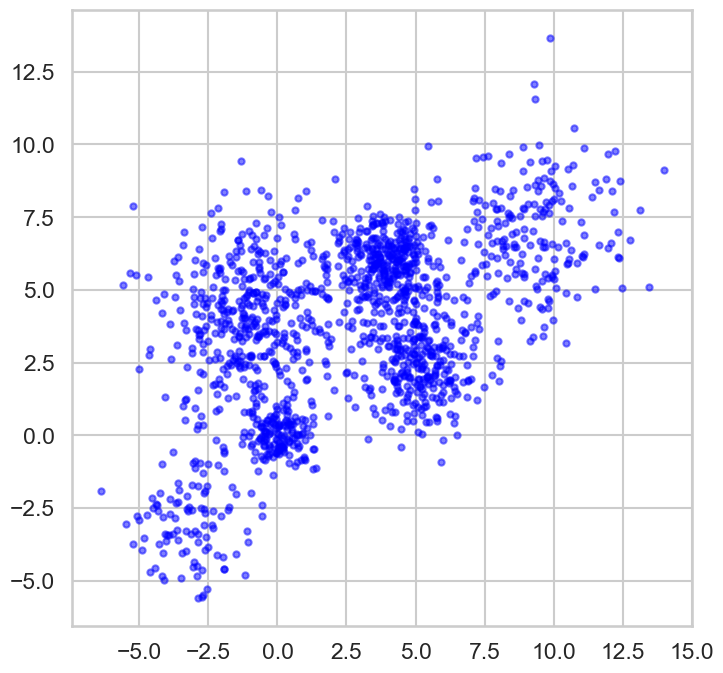

In [4]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

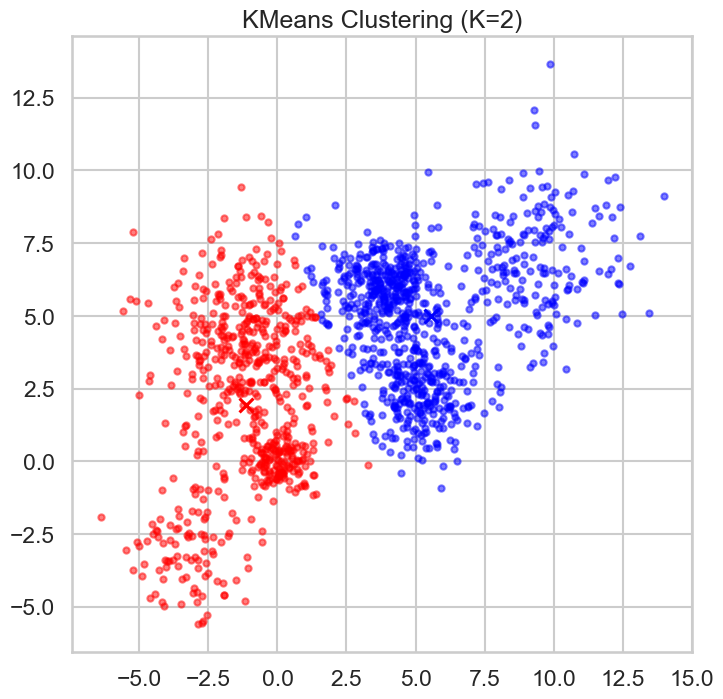

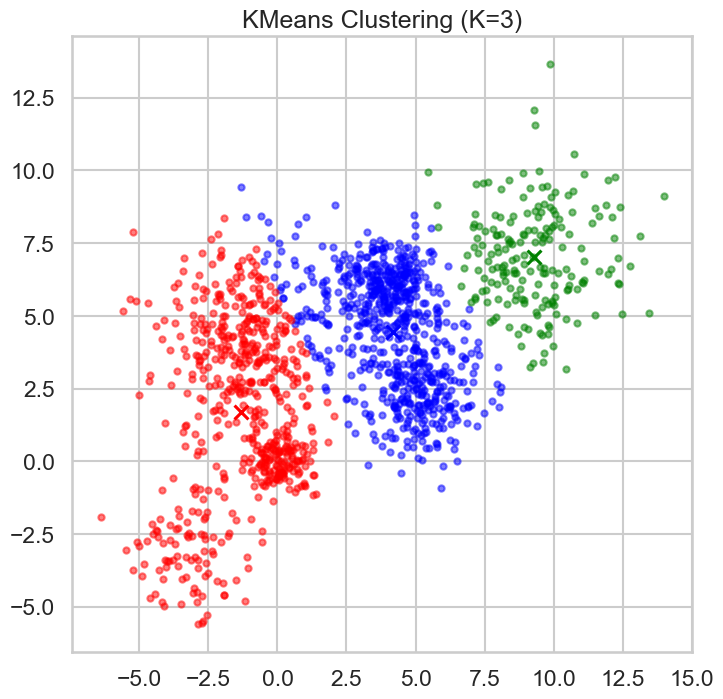

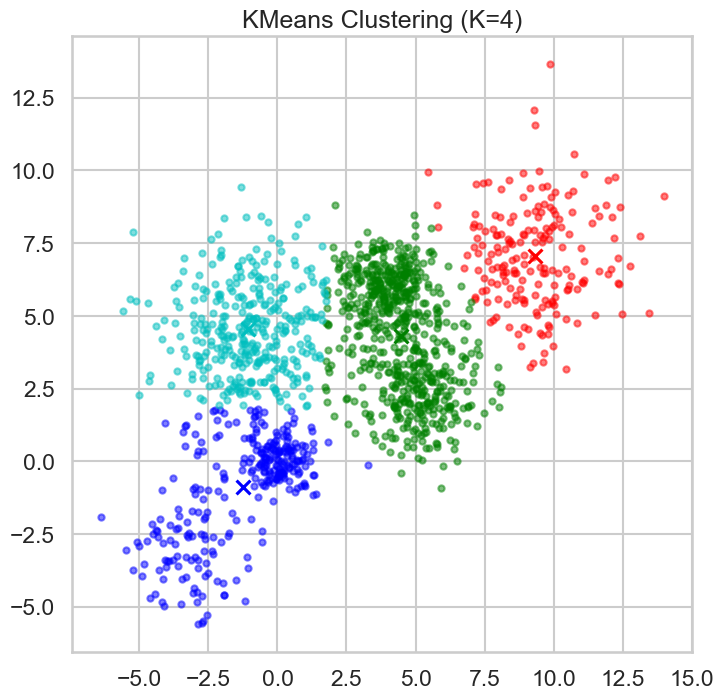

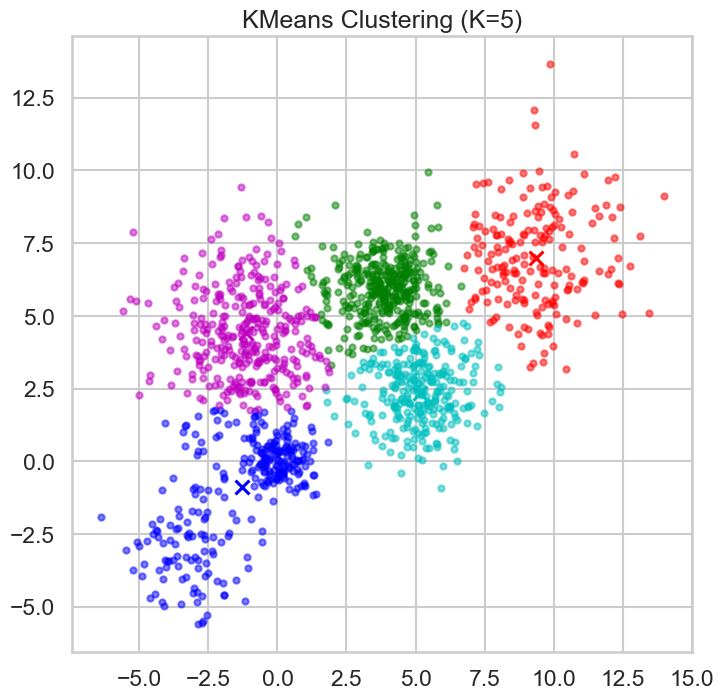

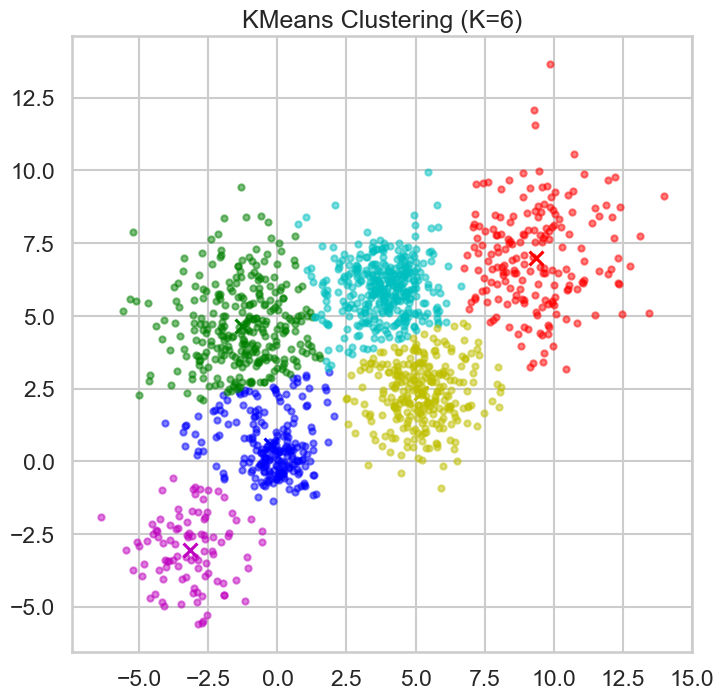

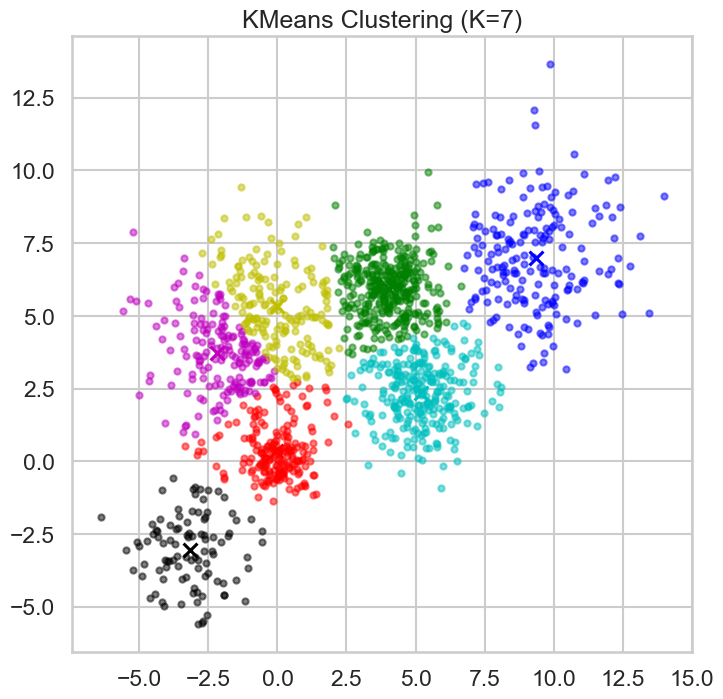

In [5]:
# Define the range of K values to try
k_values = [2, 3, 4, 5, 6, 7]

# Apply KMeans with different values of K and plot the results
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(Multi_blob_Data)
    display_cluster(Multi_blob_Data, km=km, num_clusters=k)
    plt.title(f'KMeans Clustering (K={k})')
    plt.show()

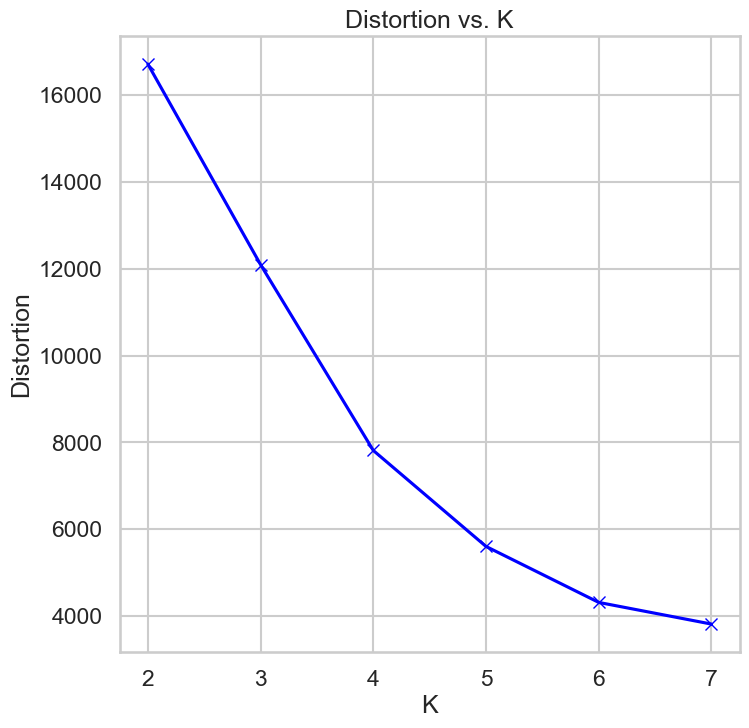

In [6]:
distortion = []
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(Multi_blob_Data)
    distortion.append(km.inertia_)
plt.plot(k_values, distortion, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('Distortion vs. K')
plt.show()

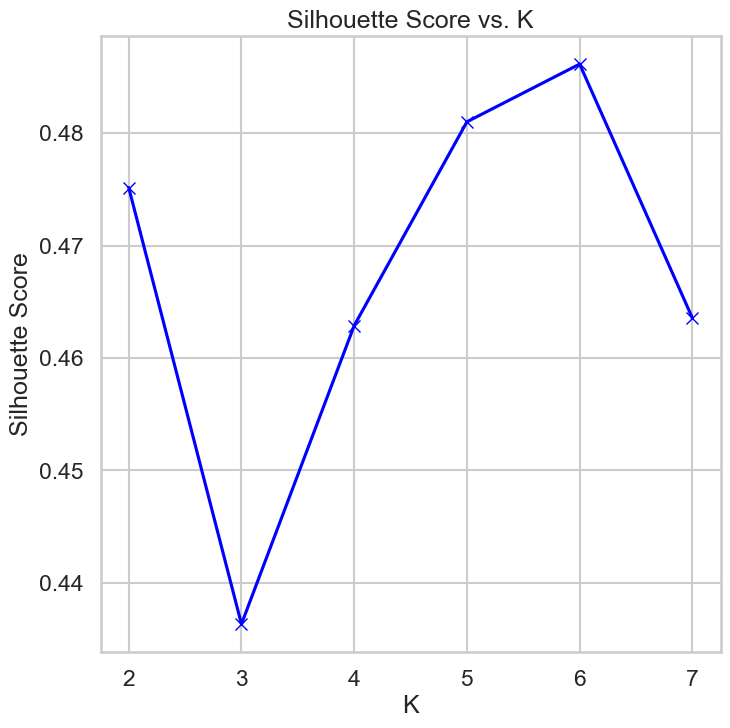

In [7]:
k_values = [2, 3, 4, 5, 6, 7]

# Compute the silhouette scores for each value of K
silhouette_scores = []
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(Multi_blob_Data)
    silhouette_scores.append(silhouette_score(Multi_blob_Data, km.labels_))

# Plot the silhouette scores versus K
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. K')
plt.show()

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [83]:
# wirte a function that takes the following parameters data, affinity, linkage, distance_threshold and cluster the data using AgglomerativeClustering 

def hierarchical_clustering(data, affinity, linkage_type, distance_threshold=None):
    # Initialize the clustering algorithm
    
    clustering = AgglomerativeClustering(n_clusters= None,affinity=affinity, linkage=linkage_type, distance_threshold=distance_threshold) 
    
    # Fit the model to the data
    clustering.fit(data)

    # Calculate the silhouette score
    unique_labels = np.unique(clustering.labels_)
    if len(unique_labels) > 1:
        score = silhouette_score(data, clustering.labels_)
    else:
        score = 0
    # Compute the linkage matrix
    linkage_matrix = sch.linkage(data, method=linkage_type)

    # Plot the dendrogram
    plt.figure(figsize=(10, 7))
    sch.dendrogram(linkage_matrix)
    if distance_threshold:
        plt.axhline(y=distance_threshold, color='r', linestyle='--')
    plt.title(f'Dendrogram ({affinity}, {linkage_type})')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()

    # Display the resulting clusters
    plt.figure(figsize=(10, 7))
    plt.scatter(data[:, 0], data[:, 1], c=clustering.labels_, cmap='rainbow')
    plt.title(f'Clusters ({affinity}, {linkage_type}, {distance_threshold}), Silhouette Score: {score:.2f}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

    return score    
    


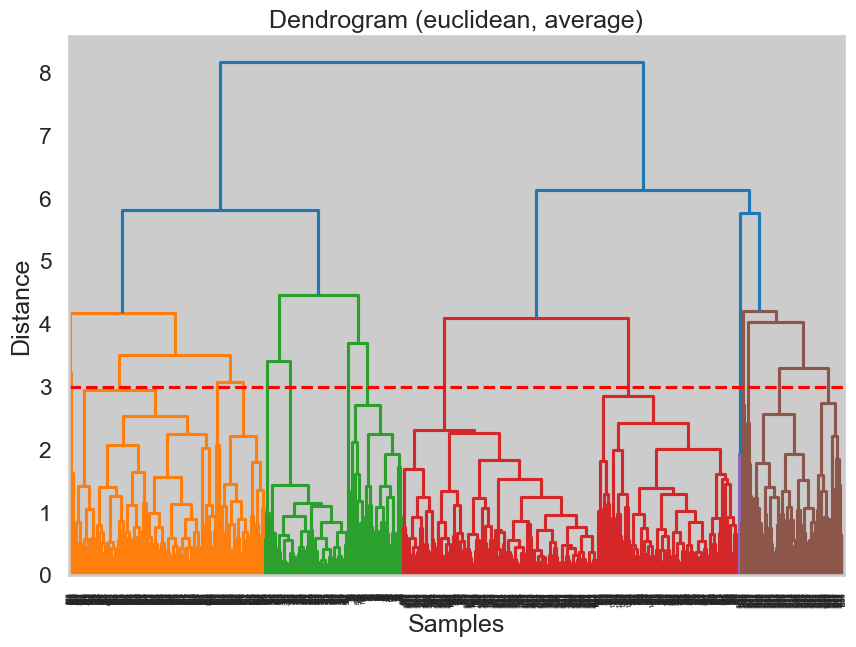

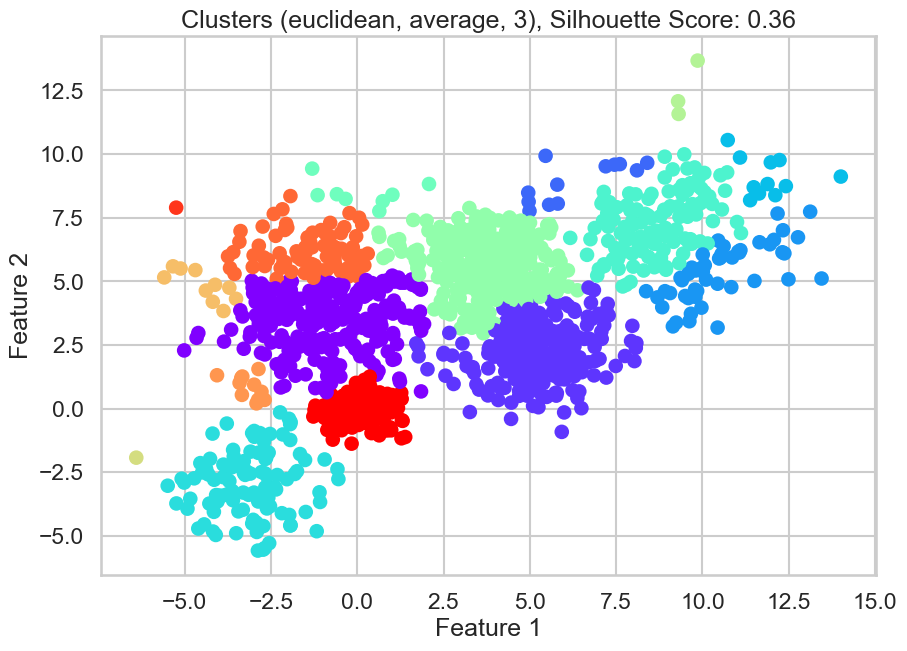

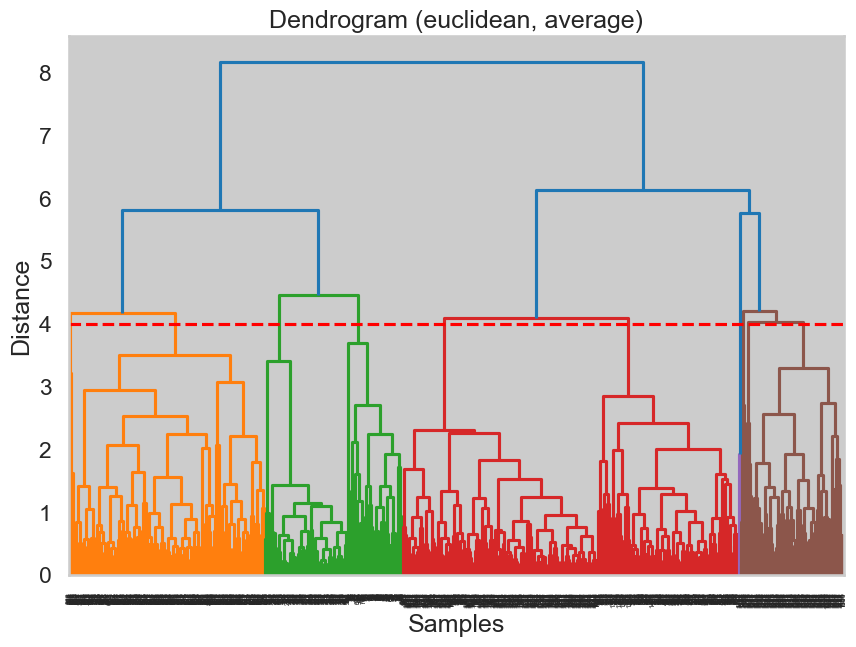

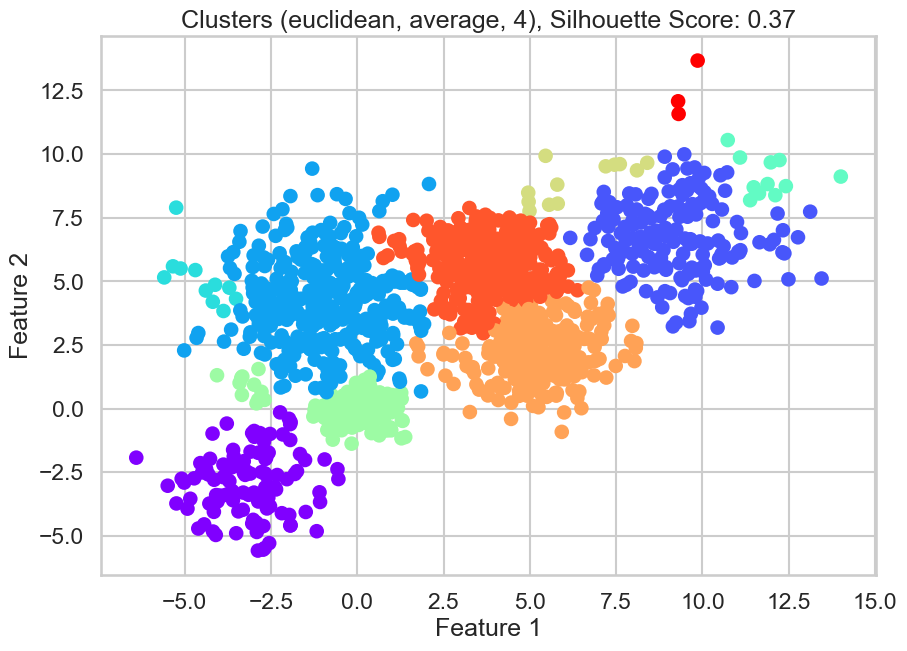

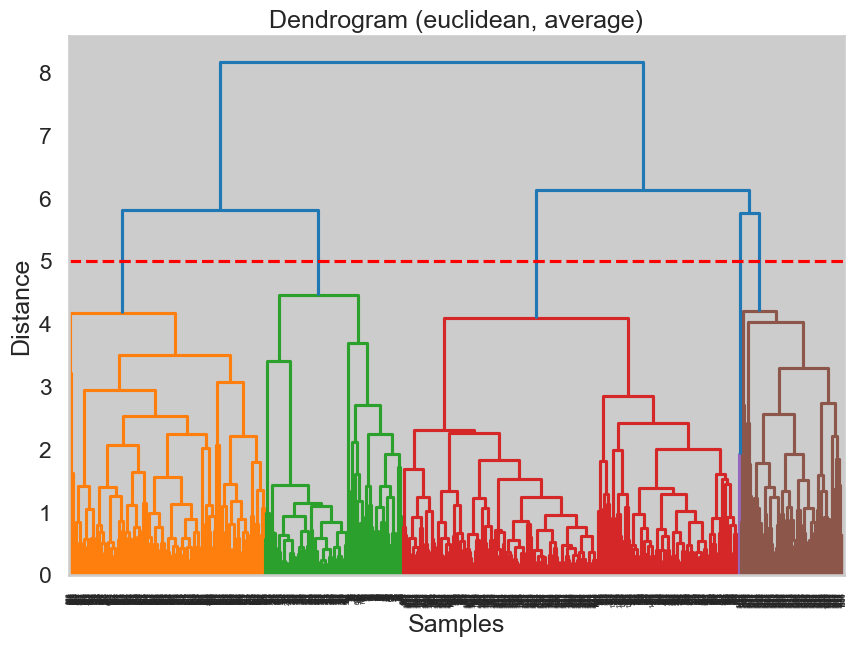

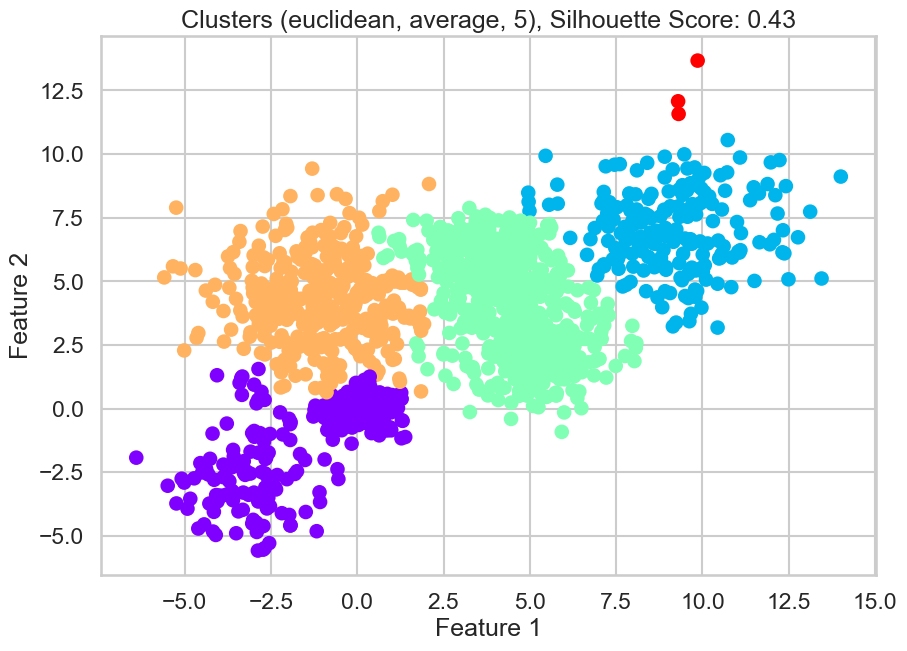

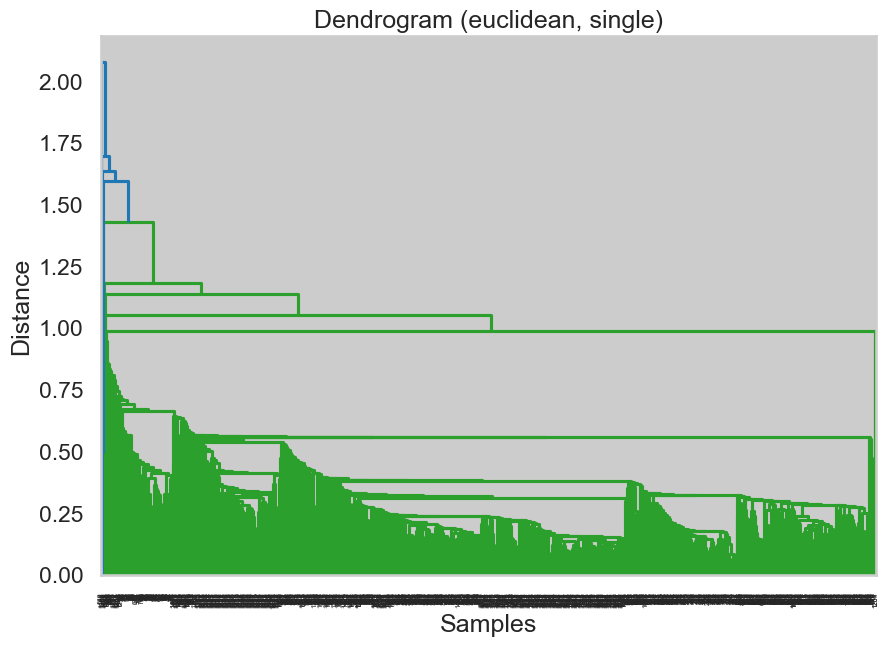

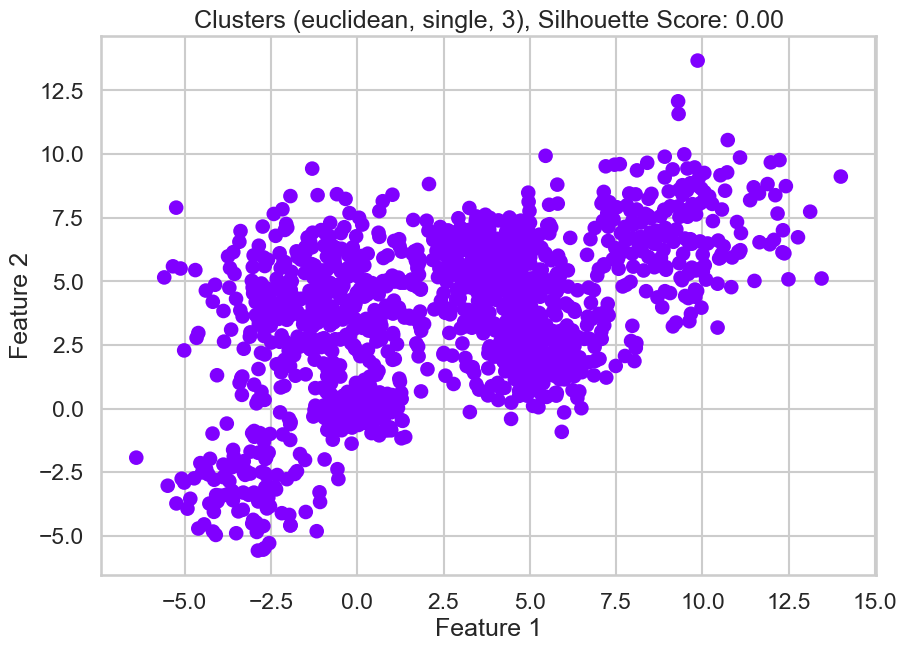

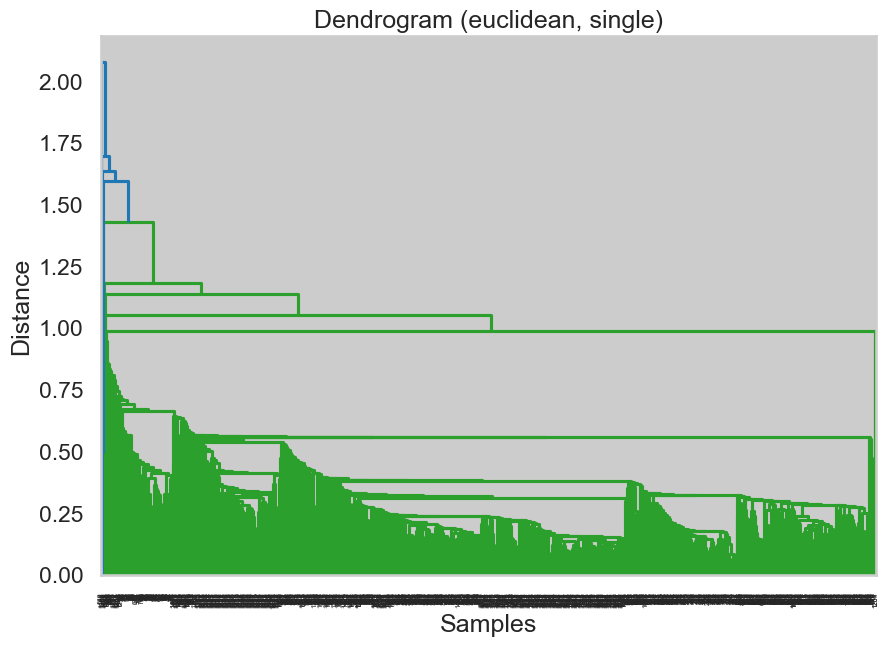

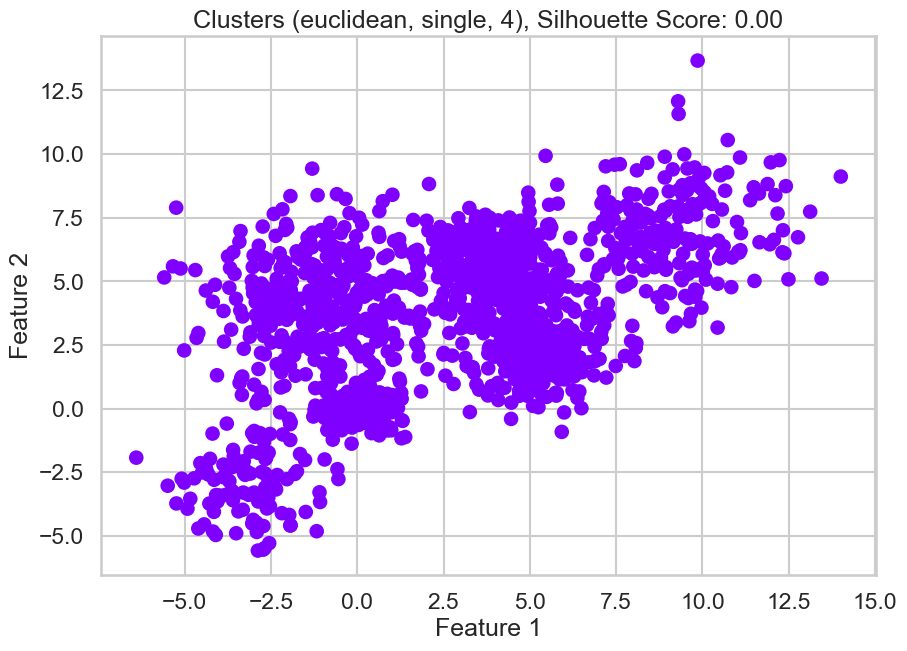

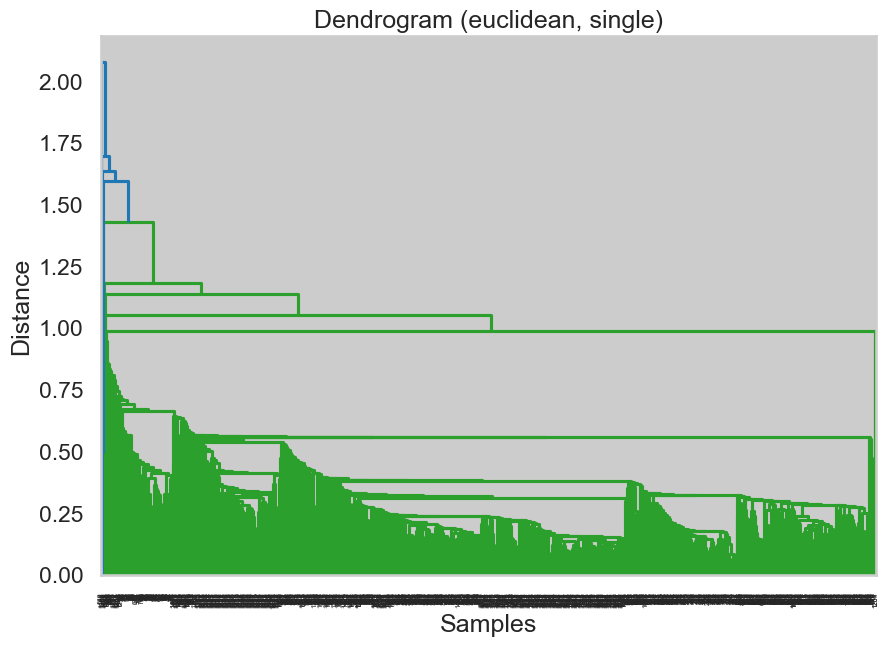

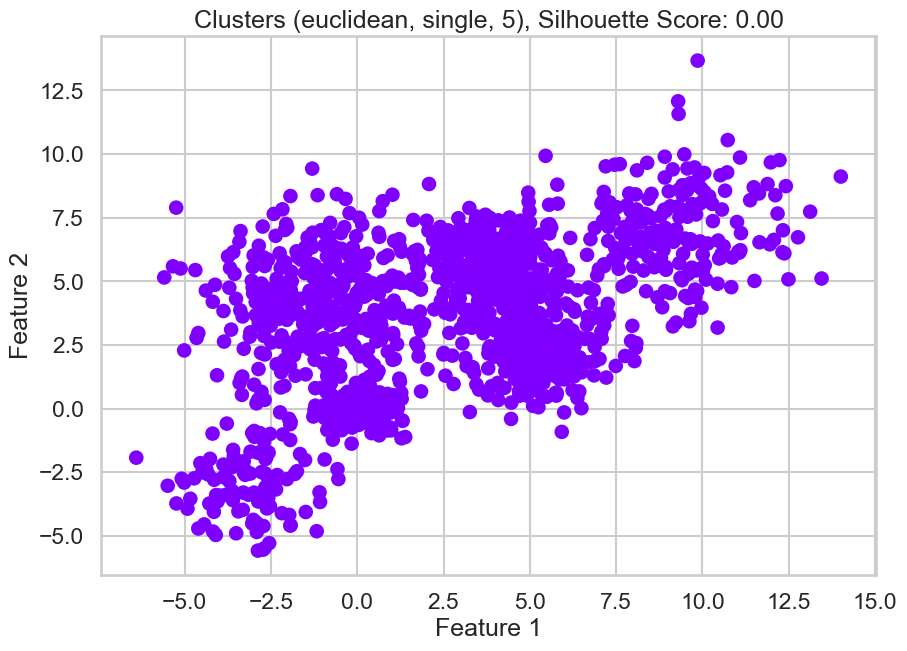

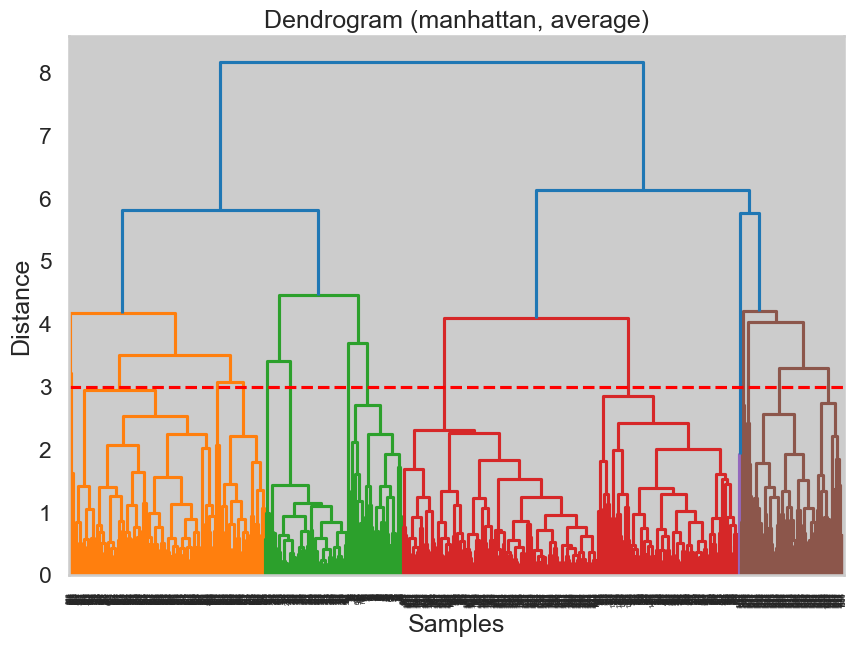

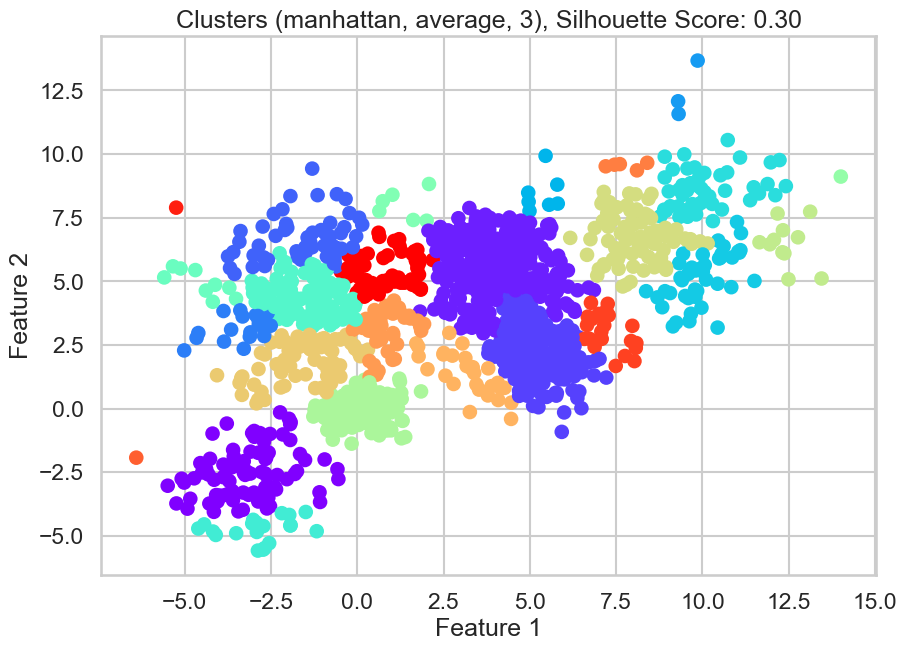

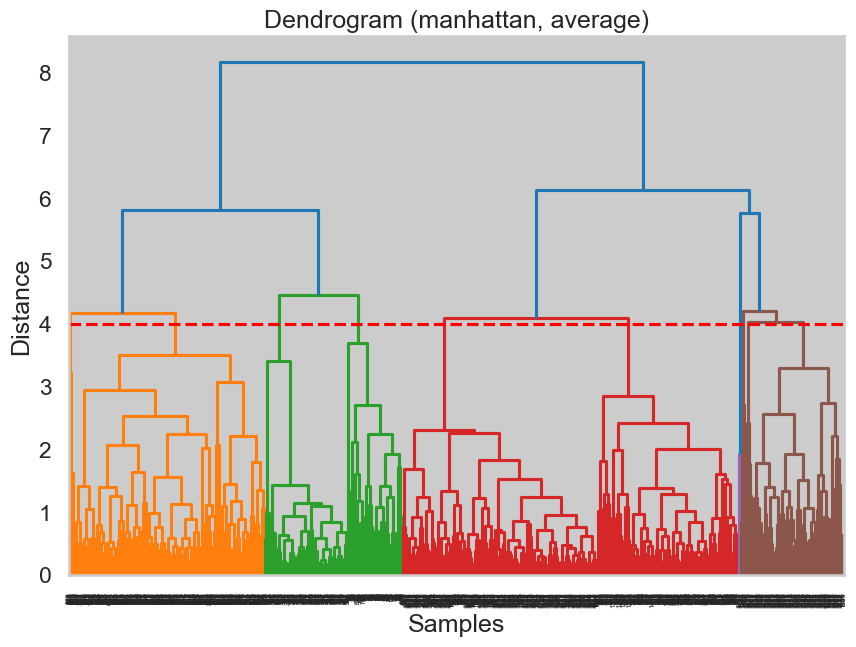

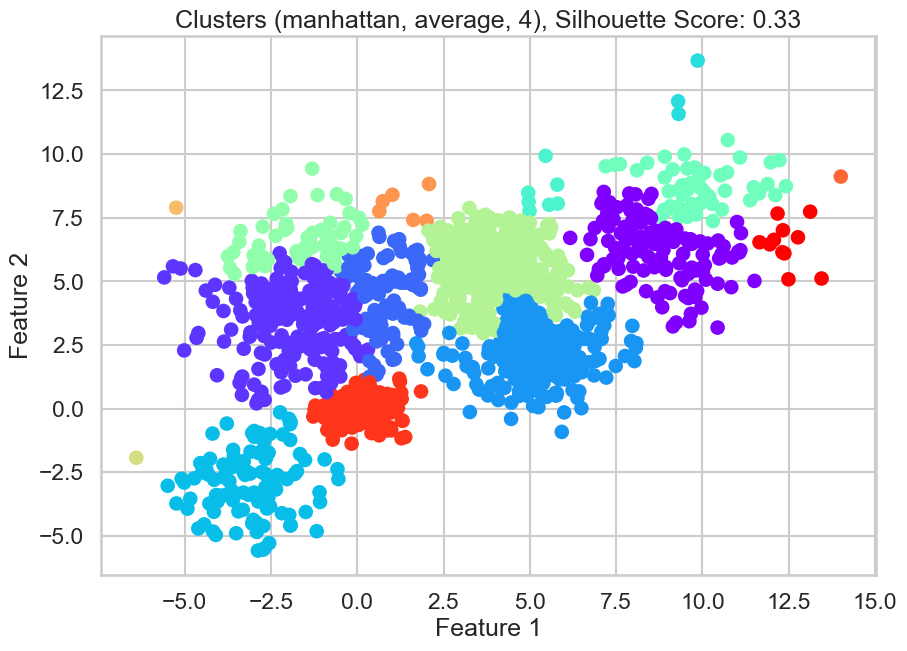

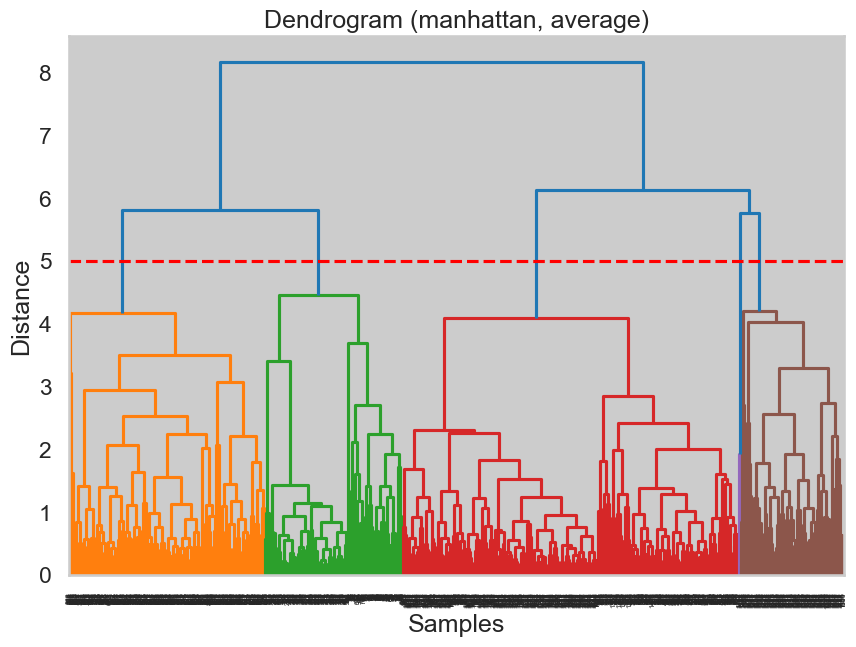

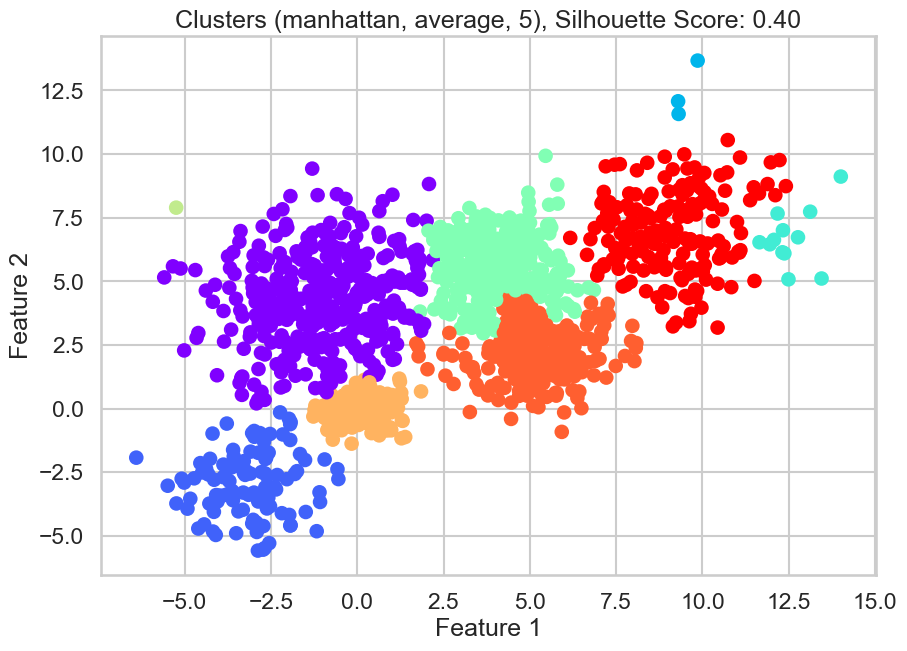

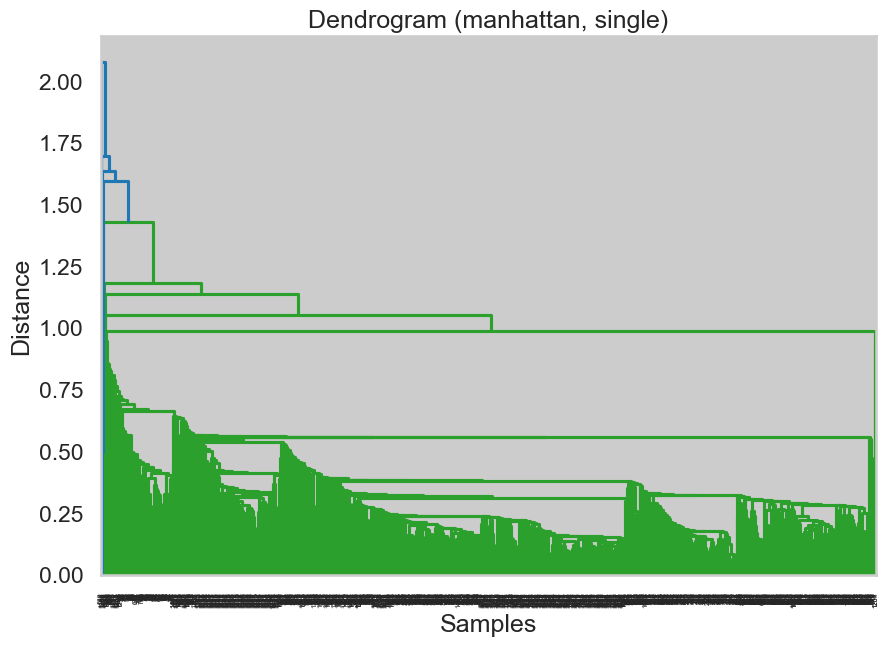

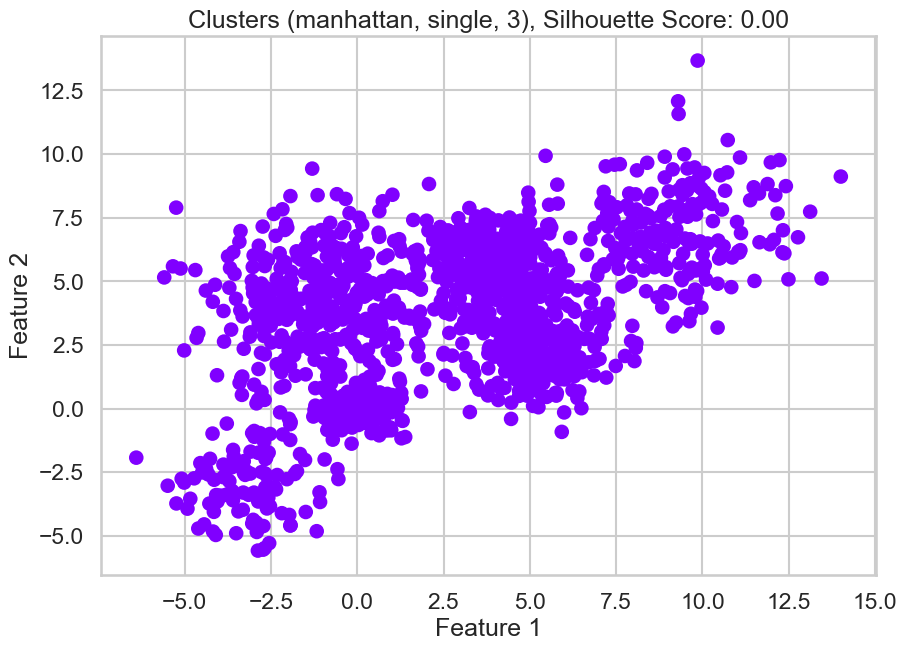

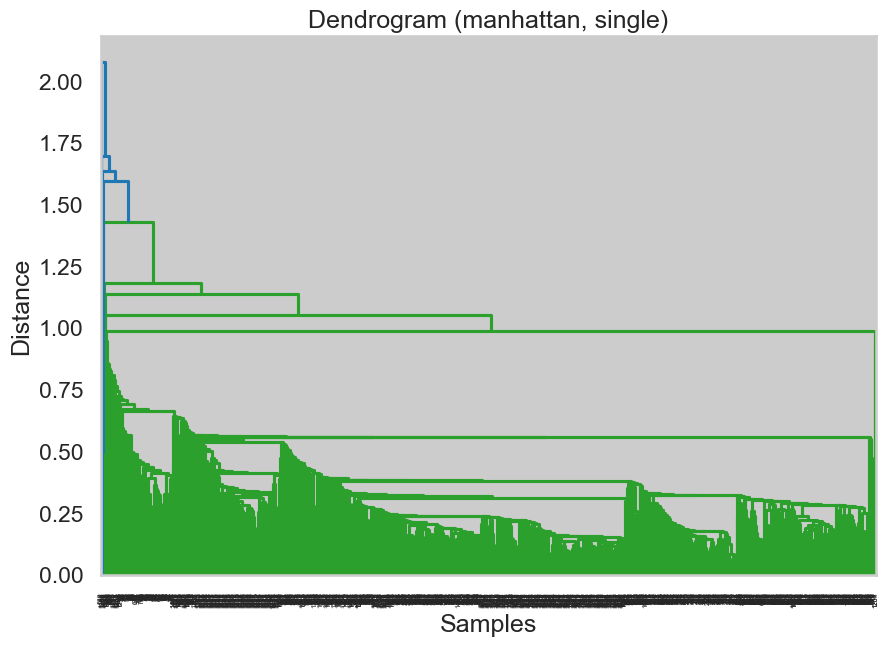

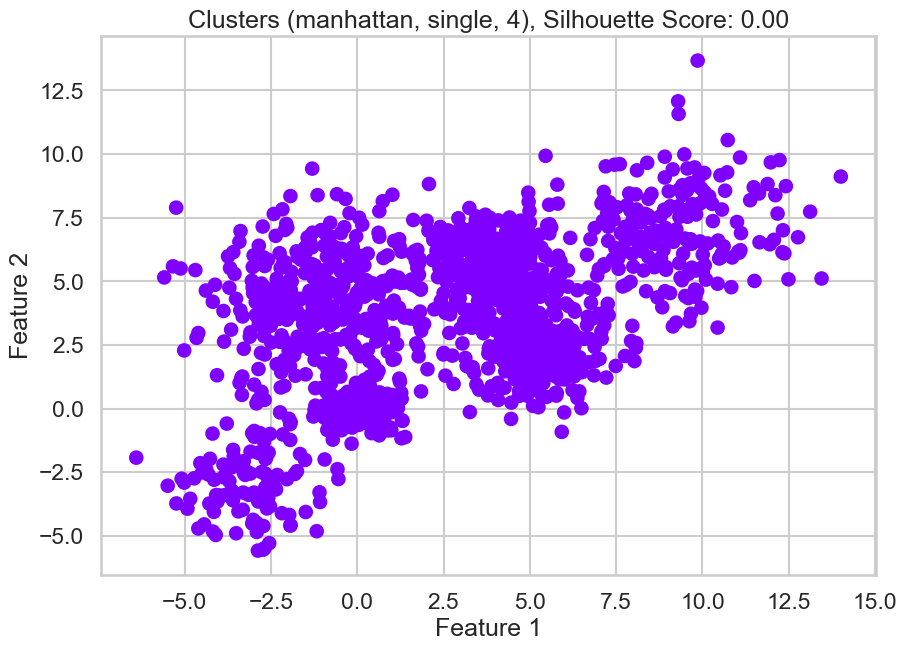

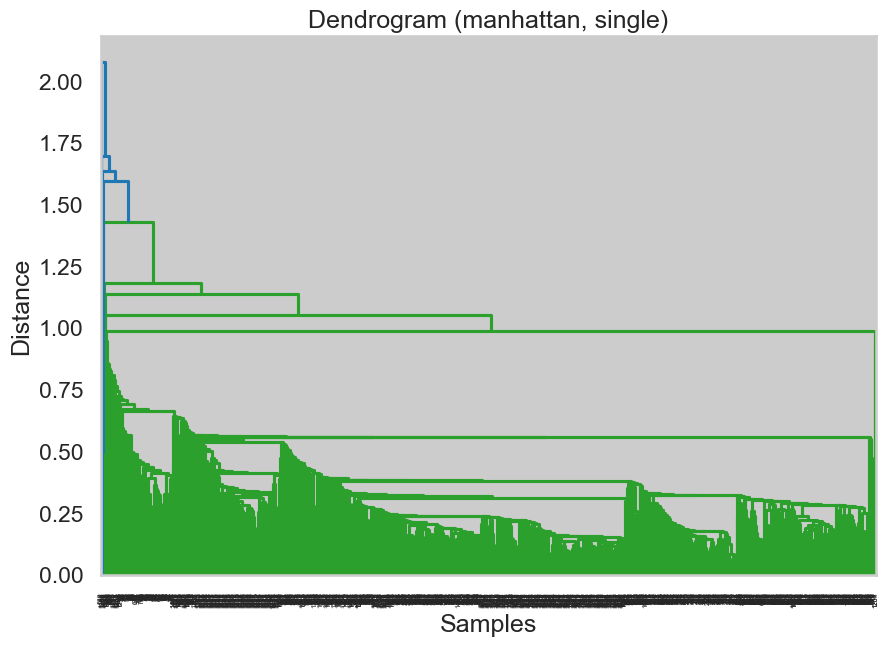

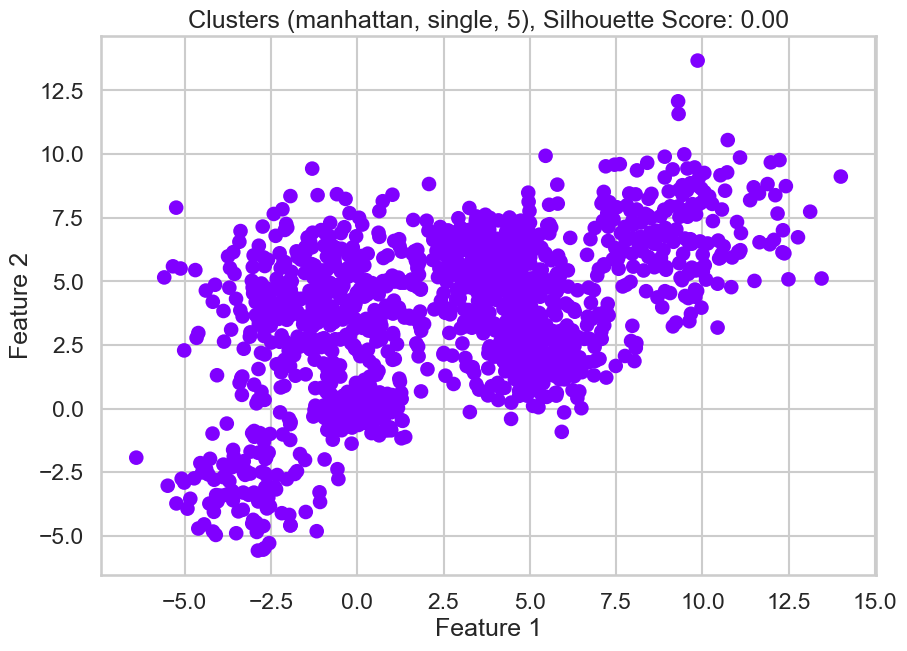

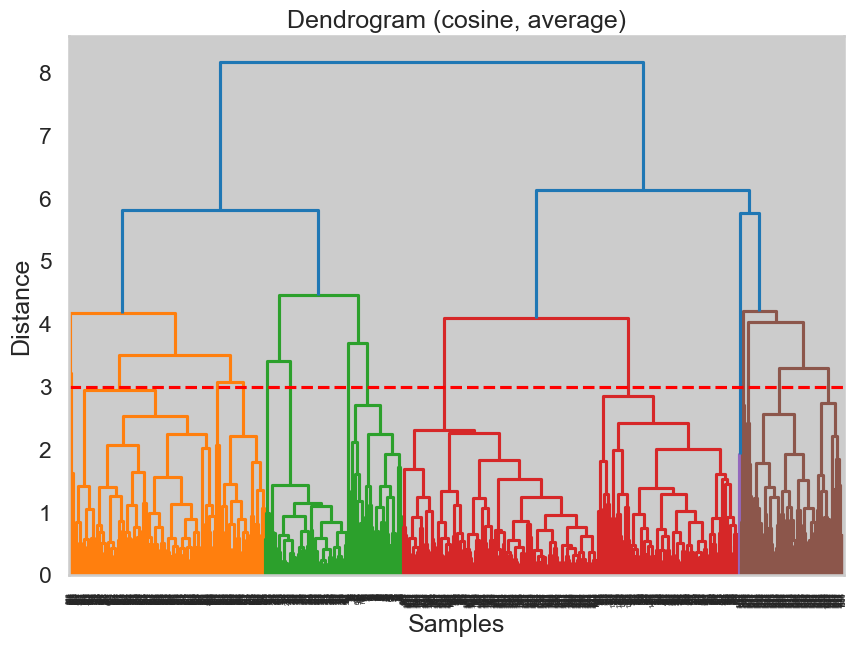

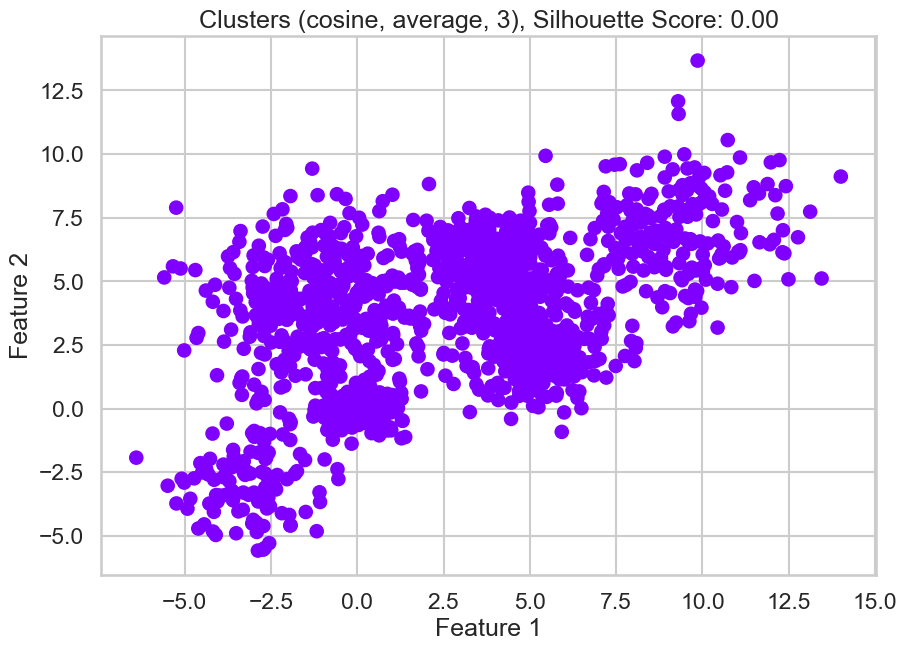

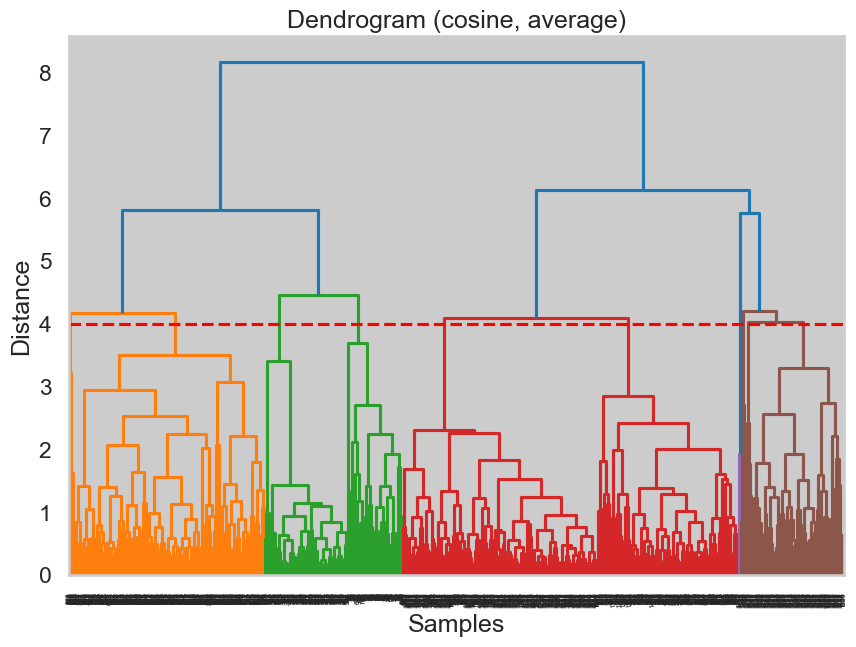

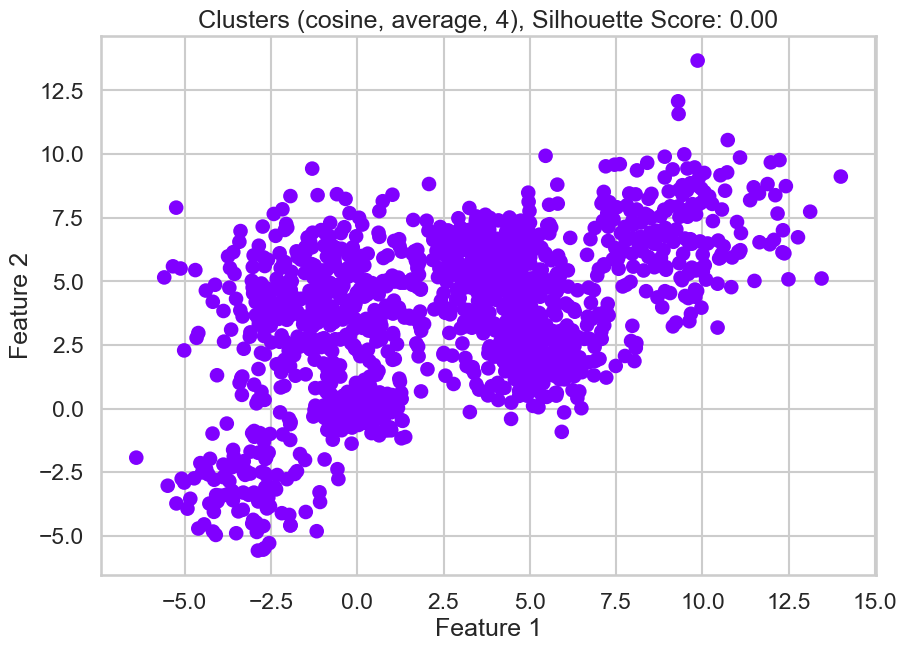

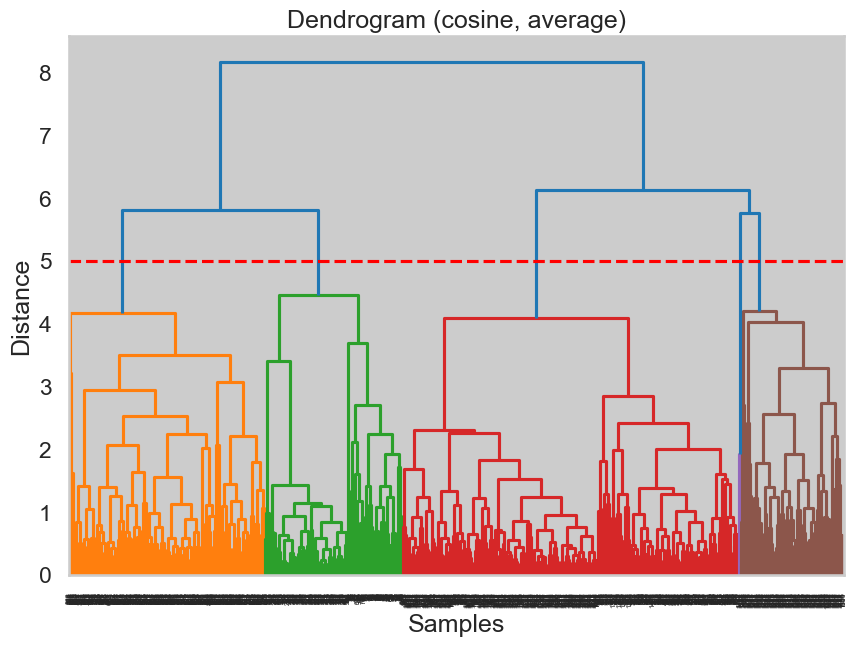

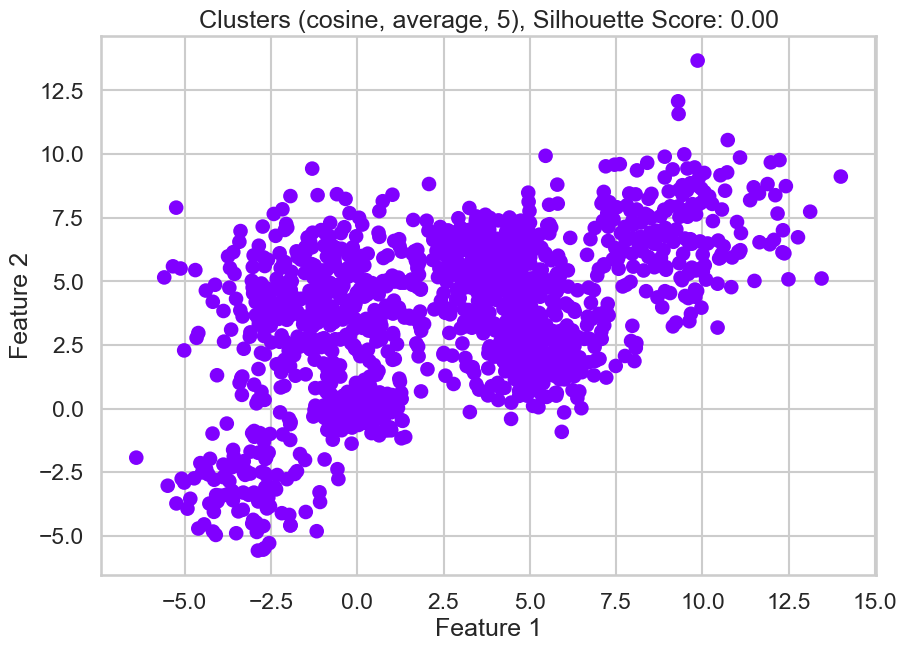

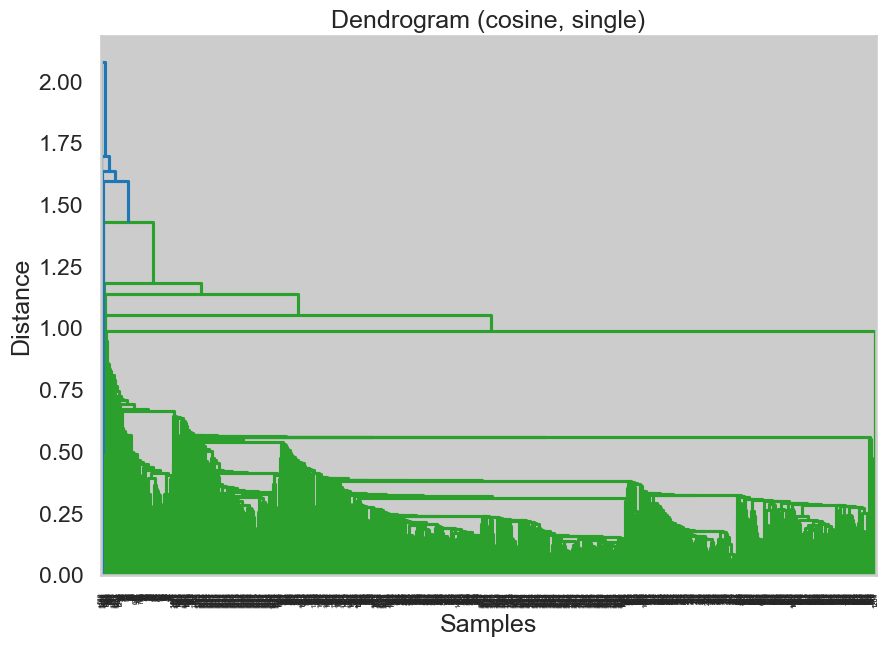

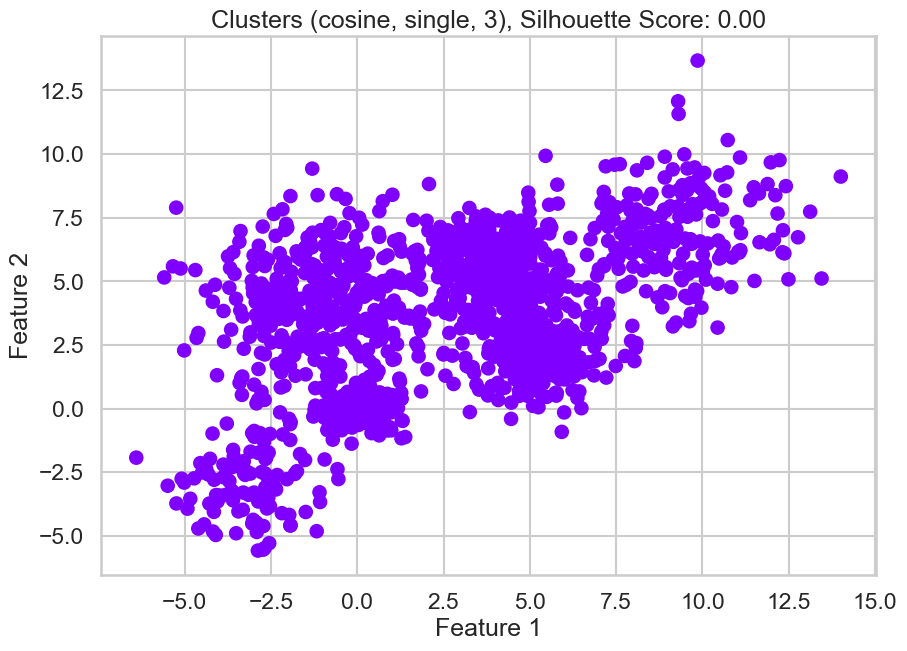

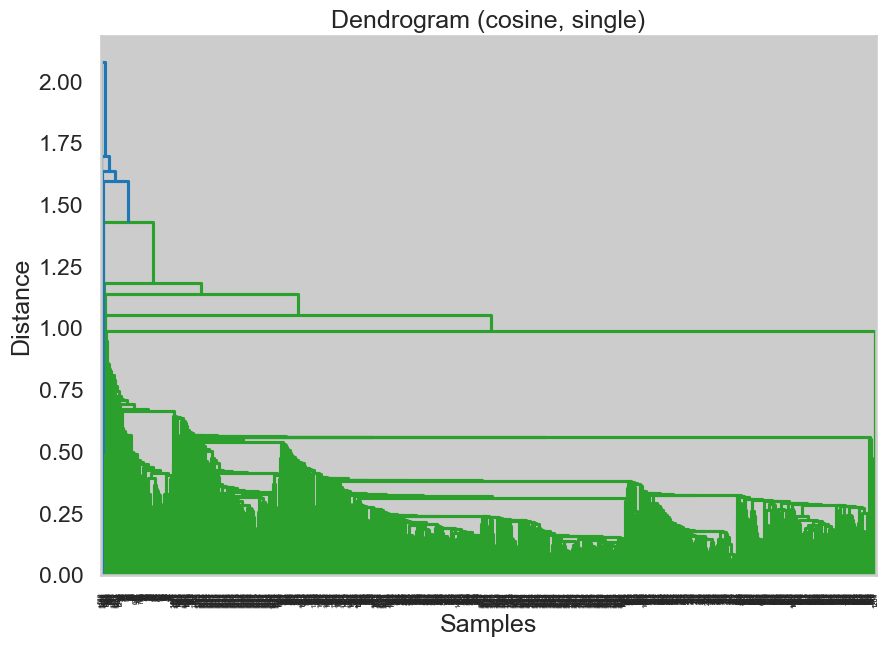

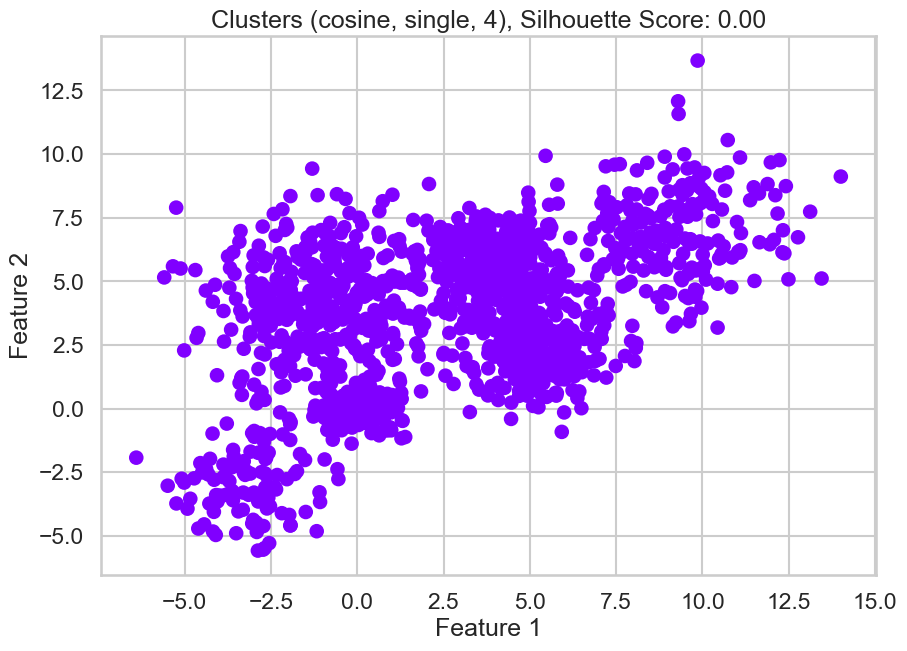

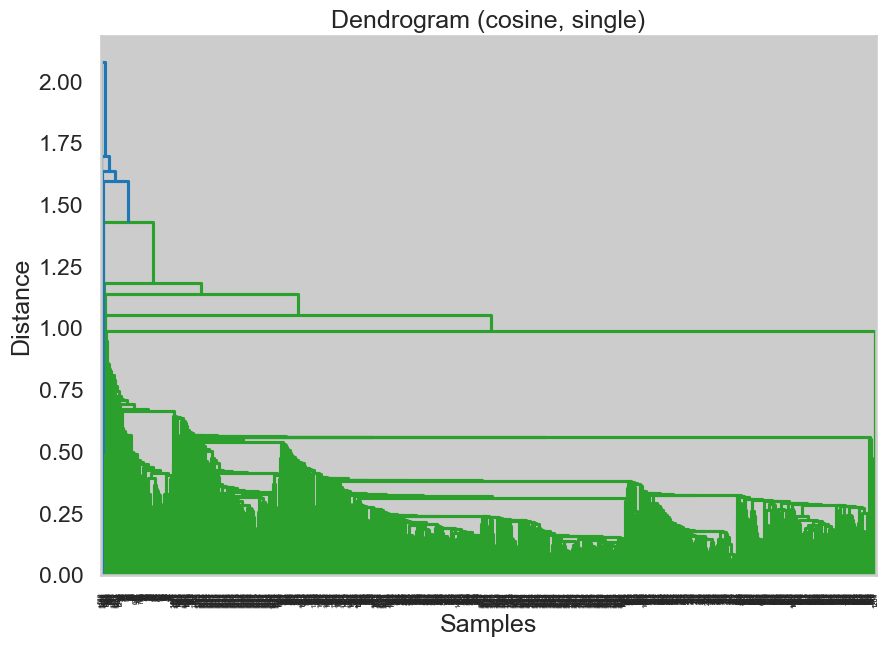

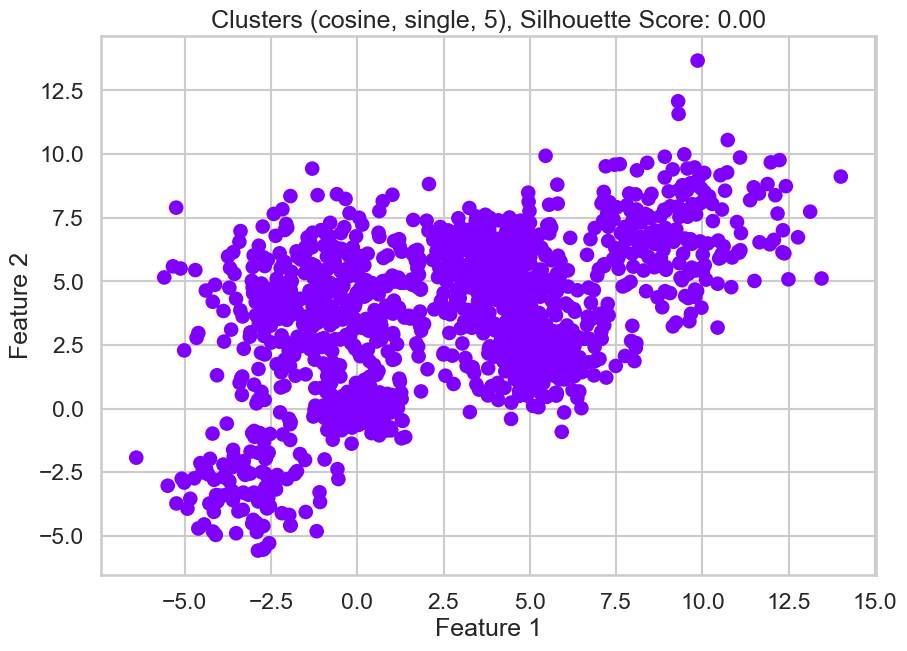

In [84]:
# Define the parameter combinations to try
affinities = ['euclidean', 'manhattan', 'cosine']
linkages = ['average', 'single']
distance_thresholds = [3, 4, 5]

# Initialize variables to store the best parameters and score
best_score = -1
best_affinity = None
best_linkage = None
best_distance_threshold = None

# Try all combinations of parameters
for affinity in affinities:
    for linkage in linkages:
        for distance_threshold in distance_thresholds:
            score = hierarchical_clustering(Multi_blob_Data, affinity, linkage, distance_threshold)

            # If the score is better than the previous best, update the variables
            if score > best_score:
                best_score = score
                best_affinity = affinity
                best_linkage = linkage
                best_distance_threshold = distance_threshold

In [85]:
# Print the best parameters and score
print(f'Best affinity: {best_affinity}')
print(f'Best linkage: {best_linkage}')
print(f'Best distance threshold: {best_distance_threshold}')
print(f'Best score: {best_score:.2f}')

Best affinity: euclidean
Best linkage: average
Best distance threshold: 5
Best score: 0.43


### This is my obsrvations about the above trials.
1. We can say when we use single linkae with high distance threshold we get the zero silhouette score this is because the single linkage is very sensitive to outliers and the high distance threshold is removing all the outliers and hence we get zero silhouette score.

2. when we use cosine with single or average linkage we get the zero silhouette score. This is because cosine test if two vectors are similar or not ranges from -1 (indicating completely dissimilar vectors) to 1 (indicating perfectly similar vectors). So when we use cosine with single or average linkage and the distance threshold is high we got the zero silhouette score.

3. when we use euclidean with average linkage and distance threshold 5 we get the best silhouette score.



### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [118]:
def dbscan (data,eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(data)
    unique_labels = np.unique(dbscan.labels_)
    if len(unique_labels) > 1:
        score = silhouette_score(data, labels)
    else:
        # cannot compute silhouette score for a single cluster
        score = False
    return score

In [119]:
eps_range = np.arange(0.1, 3.1, 0.1)
min_samples_range = range(5, 26)
silhouette_scores = []
for eps in eps_range:
    for min_samples in min_samples_range:
        score = dbscan(Multi_blob_Data,eps, min_samples)
        if score is not False:
            silhouette_scores.append([eps, min_samples, score])
silhouette_scores = np.array(silhouette_scores)


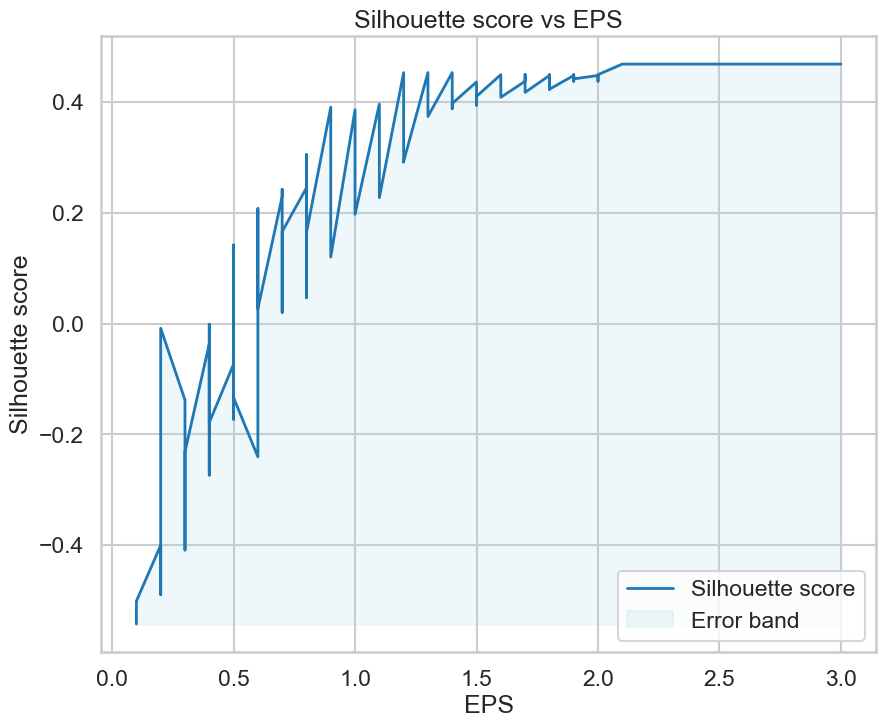

In [120]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(silhouette_scores[:, 0], silhouette_scores[:, 2],linewidth=2, label='Silhouette score')
ax.fill_between(silhouette_scores[:, 0], silhouette_scores[:, 2].min(), silhouette_scores[:, 2], alpha=0.2, label='Error band', color='lightblue')
ax.set_xlabel('EPS')
ax.set_ylabel('Silhouette score')
ax.set_title('Silhouette score vs EPS')
ax.legend(loc='lower right')
plt.show()

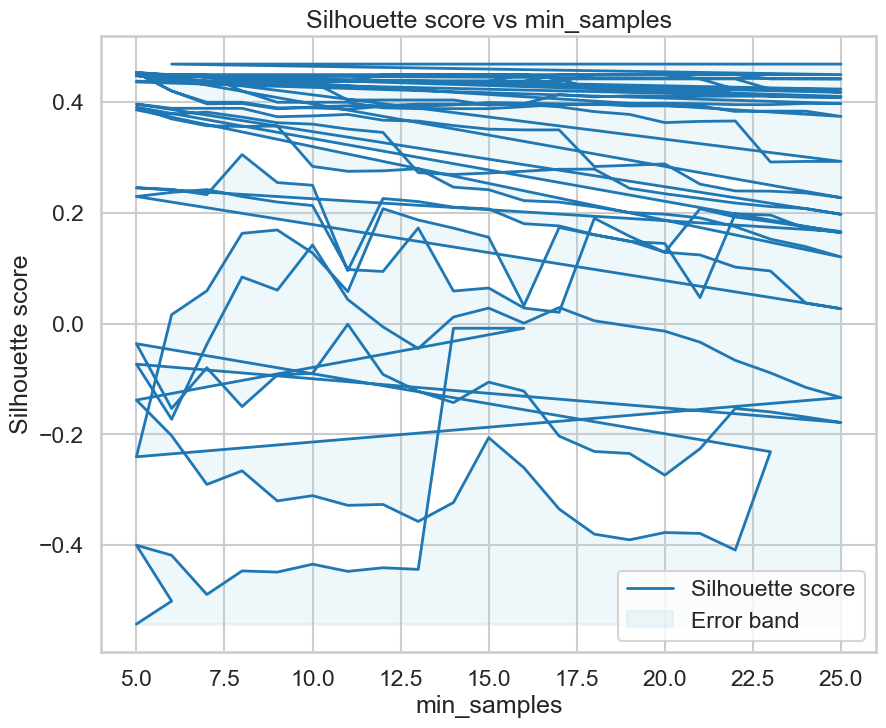

In [121]:
fig, ax = plt.subplots(figsize=(10, 8))
# make the x-axis a have the same scale as the min_samples range
ax.plot(silhouette_scores[:, 1], silhouette_scores[:, 2],linewidth=2, label='Silhouette score')
ax.fill_between(silhouette_scores[:, 1], silhouette_scores[:, 2].min(), silhouette_scores[:, 2], alpha=0.2, label='Error band', color='lightblue')
ax.set_xlabel('min_samples')
ax.set_ylabel('Silhouette score')
ax.set_title('Silhouette score vs min_samples')
ax.legend(loc='lower right')
plt.show()

In [123]:
best_score_idx = np.argmax(silhouette_scores[:, 2])
best_eps = silhouette_scores[best_score_idx, 0]
best_min_samples = silhouette_scores[best_score_idx, 1]
best_min_samples = int(best_min_samples)
best_score = silhouette_scores[best_score_idx, 2]
print(f'Best parameters: eps={best_eps}, min_samples={best_min_samples}')
print(f'Best silhouette score: {best_score}')

Best parameters: eps=2.1, min_samples=6
Best silhouette score: 0.4685207355522043


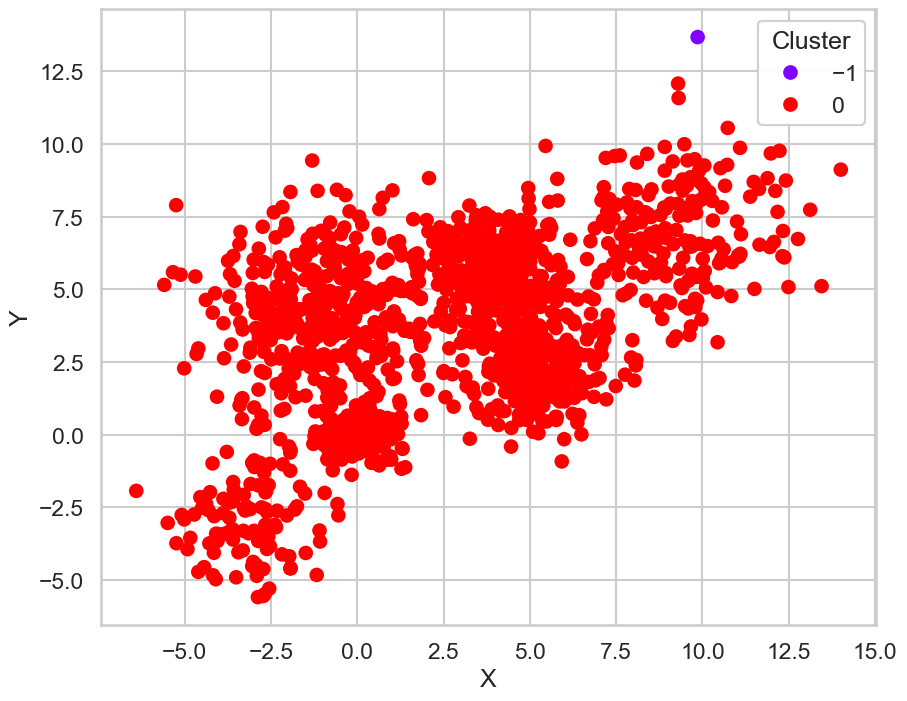

In [124]:
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels = dbscan.fit_predict(Multi_blob_Data)

fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=labels, cmap='rainbow')
ax.set_xlabel('X')
ax.set_ylabel('Y')
legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Cluster")
ax.add_artist(legend)
plt.show()


### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

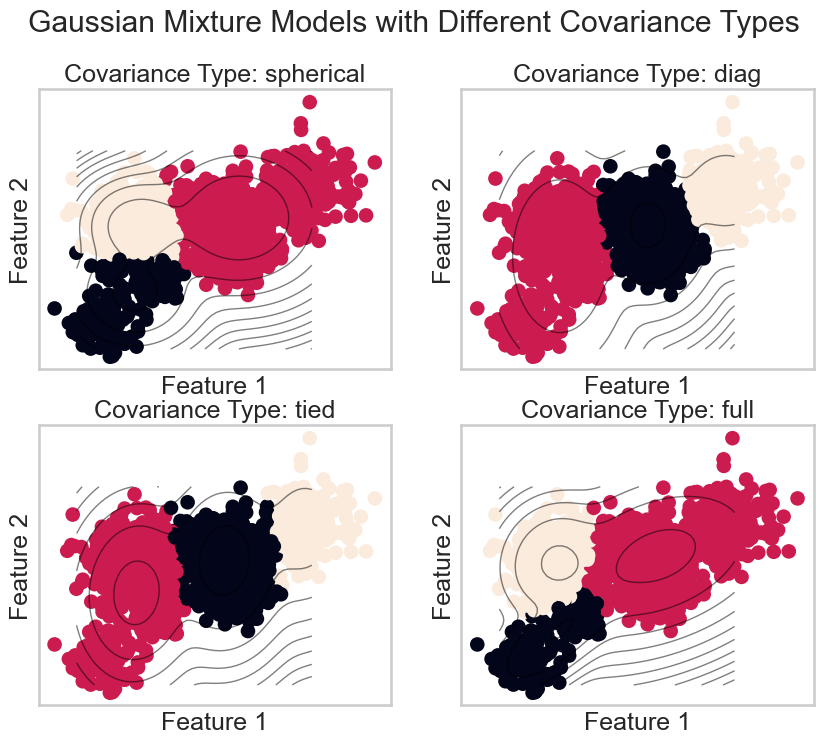

In [132]:
n_components = 3  # number of Gaussian components
covariance_types = ['spherical', 'diag', 'tied', 'full'] # types of covariance to try

plt.figure(figsize=(10, 8))
for i, cov_type in enumerate(covariance_types):
    gmm = GaussianMixture(n_components=n_components, covariance_type=cov_type)
    gmm.fit(Multi_blob_Data)

    # plot the resulting distribution
    plt.subplot(2, 2, i+1)
    plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=gmm.predict(Multi_blob_Data))
    plt.title("Covariance Type: {}".format(cov_type))
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.xticks(())
    plt.yticks(())
    
    # plot the individual Gaussian components
    x = np.linspace(-5, 10)
    y = np.linspace(-5, 10)
    X_mesh, Y_mesh = np.meshgrid(x, y)
    XX = np.array([X_mesh.ravel(), Y_mesh.ravel()]).T
    Z = -gmm.score_samples(XX)
    Z = Z.reshape(X_mesh.shape)
    plt.contour(X_mesh, Y_mesh, Z, levels=10, linewidths=1, colors='k', alpha=0.5)
    
plt.suptitle("Gaussian Mixture Models with Different Covariance Types")
plt.show()

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [125]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']

# normalize the data
iris_data.data = iris_data.data / iris_data.data.max(axis=0)



{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 